#Car VS Bike Image Classification
DLP Lab#2 - K213309


---




##Importing Dataset

In [1]:
!pip install -q kaggle
from google.colab import files
# files.upload()  #Upload kaggle.json file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset
!unzip car-vs-bike-classification-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
 94% 97.0M/103M [00:01<00:00, 87.5MB/s]
100% 103M/103M [00:01<00:00, 76.4MB/s] 
Archive:  car-vs-bike-classification-dataset.zip
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1004).jpeg  
  inflating: Car-Bike-Dataset/Bike/Bike (1005).jpeg  
  inflating: Car-Bik

##Dividing data into training and validation

In [2]:
import os

!mkdir Car-Bike-Dataset/train
!mkdir Car-Bike-Dataset/validation && mkdir Car-Bike-Dataset/validation/Bike && mkdir Car-Bike-Dataset/validation/Car

base = "/content/Car-Bike-Dataset"

Bike = os.path.join(f'{base}', "Bike")
Car = os.path.join(f'{base}', "Car")

i = 0
for x in os.listdir(Bike):
  if i == 500: break
  os.rename(f'{Bike}/{x}', f'{base}/validation/Bike/{x}')
  i+=1

i = 0
for x in os.listdir(Car):
  if i == 500: break
  os.rename(f'{Car}/{x}', f'{base}/validation/Car/{x}')
  i+=1

!mv Car-Bike-Dataset/Bike Car-Bike-Dataset/train && mv Car-Bike-Dataset/Car Car-Bike-Dataset/train

##Building a Covnet

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [4]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

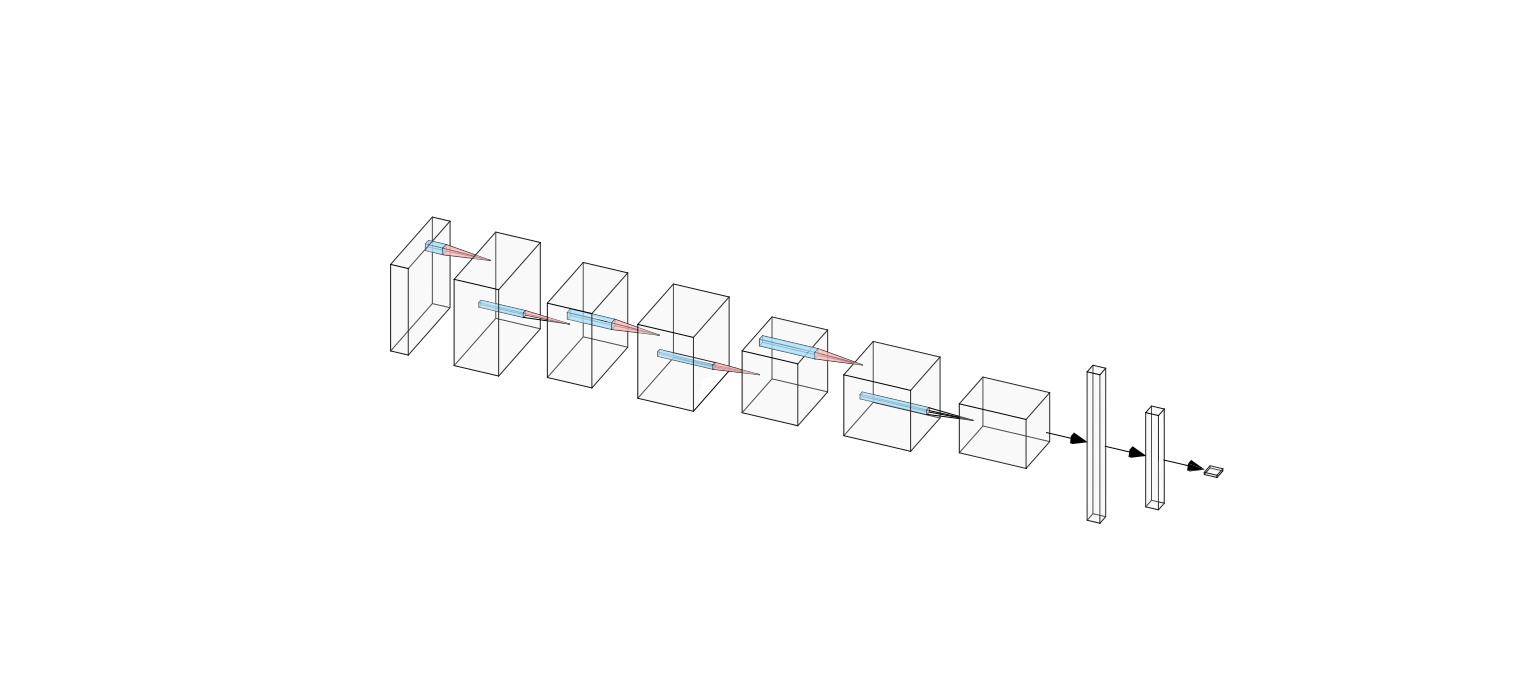

With the given model parameters and feature map/filter sizes, the CNN looks something like this.

##Compiling the Model

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

##Pre-processing Data

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        os.path.join(base, 'train'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        os.path.join(base, 'validation'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##Training & Validating Model

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/15


<ipython-input-7-2b8f216bd299>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 - 10s - loss: 0.6625 - acc: 0.6875 - val_loss: 0.4602 - val_acc: 0.7650 - 10s/epoch - 99ms/step
Epoch 2/15
100/100 - 7s - loss: 0.3364 - acc: 0.8510 - val_loss: 0.4605 - val_acc: 0.7980 - 7s/epoch - 70ms/step
Epoch 3/15
100/100 - 7s - loss: 0.2435 - acc: 0.8975 - val_loss: 0.2921 - val_acc: 0.8830 - 7s/epoch - 67ms/step
Epoch 4/15
100/100 - 6s - loss: 0.2140 - acc: 0.9160 - val_loss: 0.3331 - val_acc: 0.8690 - 6s/epoch - 63ms/step
Epoch 5/15
100/100 - 6s - loss: 0.1589 - acc: 0.9385 - val_loss: 0.2031 - val_acc: 0.9180 - 6s/epoch - 58ms/step
Epoch 6/15
100/100 - 7s - loss: 0.1412 - acc: 0.9440 - val_loss: 0.2063 - val_acc: 0.9240 - 7s/epoch - 70ms/step
Epoch 7/15
100/100 - 7s - loss: 0.1101 - acc: 0.9585 - val_loss: 0.2300 - val_acc: 0.9180 - 7s/epoch - 69ms/step
Epoch 8/15
100/100 - 7s - loss: 0.0936 - acc: 0.9655 - val_loss: 0.2282 - val_acc: 0.9210 - 7s/epoch - 69ms/step
Epoch 9/15
100/100 - 6s - loss: 0.0776 - acc: 0.9755 - val_loss: 0.2565 - val_acc: 0.9190 - 6s/epoch - 58

##Testing Model

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Downloaded an image of a car from
# https://unsplash.com/photos/blue-chevrolet-coupe-2AovfzYV3rc

img = image.load_img('stefan-rodriguez-2AovfzYV3rc-unsplash.jpg', target_size = (150, 150))
img = image.img_to_array(img)
img = img.reshape(1,150,150,3)

prediction = model.predict(img)
print('Car' if prediction else 'Bike')


1/1 [==============================] - 0s 250ms/step
Car


##Clean Up

In [ ]:
import os, signal
!rm car-vs-bike-classification-dataset.zip
!rm -r Car-Bike-Dataset
!rm kaggle.json
os.kill(os.getpid(), signal.SIGKILL)